## Plot Results by factor

Produces the factor plots. Expects metrics that were computed via the ``process_results`` notebook.

In [ ]:
# If None, assumes metrics are located in the "notebooks/summary/secenarios" dir.
METRIC_SCENARIO_DIR = None # e.g. "notebooks/summary_review/scenarios"

# Whether to save the plots
SAVE = False

In [8]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from moralsim.analysis.plots import grouped_bar_from_wide, wide_to_long
from moralsim.analysis.utils import load_all_scenario_results
import pandas as pd

dfs = load_all_scenario_results(with_binary=True, transpose=False, scenario_dir=METRIC_SCENARIO_DIR)
df = dfs["morality"].copy()
df_secondary = dfs["morality_binary"].copy()

data_long = wide_to_long(df, "score")
secondary_long  = wide_to_long(df_secondary,  "secondary_score")


data_mean = data_long.pivot(index="model", columns="scenario", values="score")
binary_mean = secondary_long.pivot(index="model", columns="scenario", values="secondary_score")


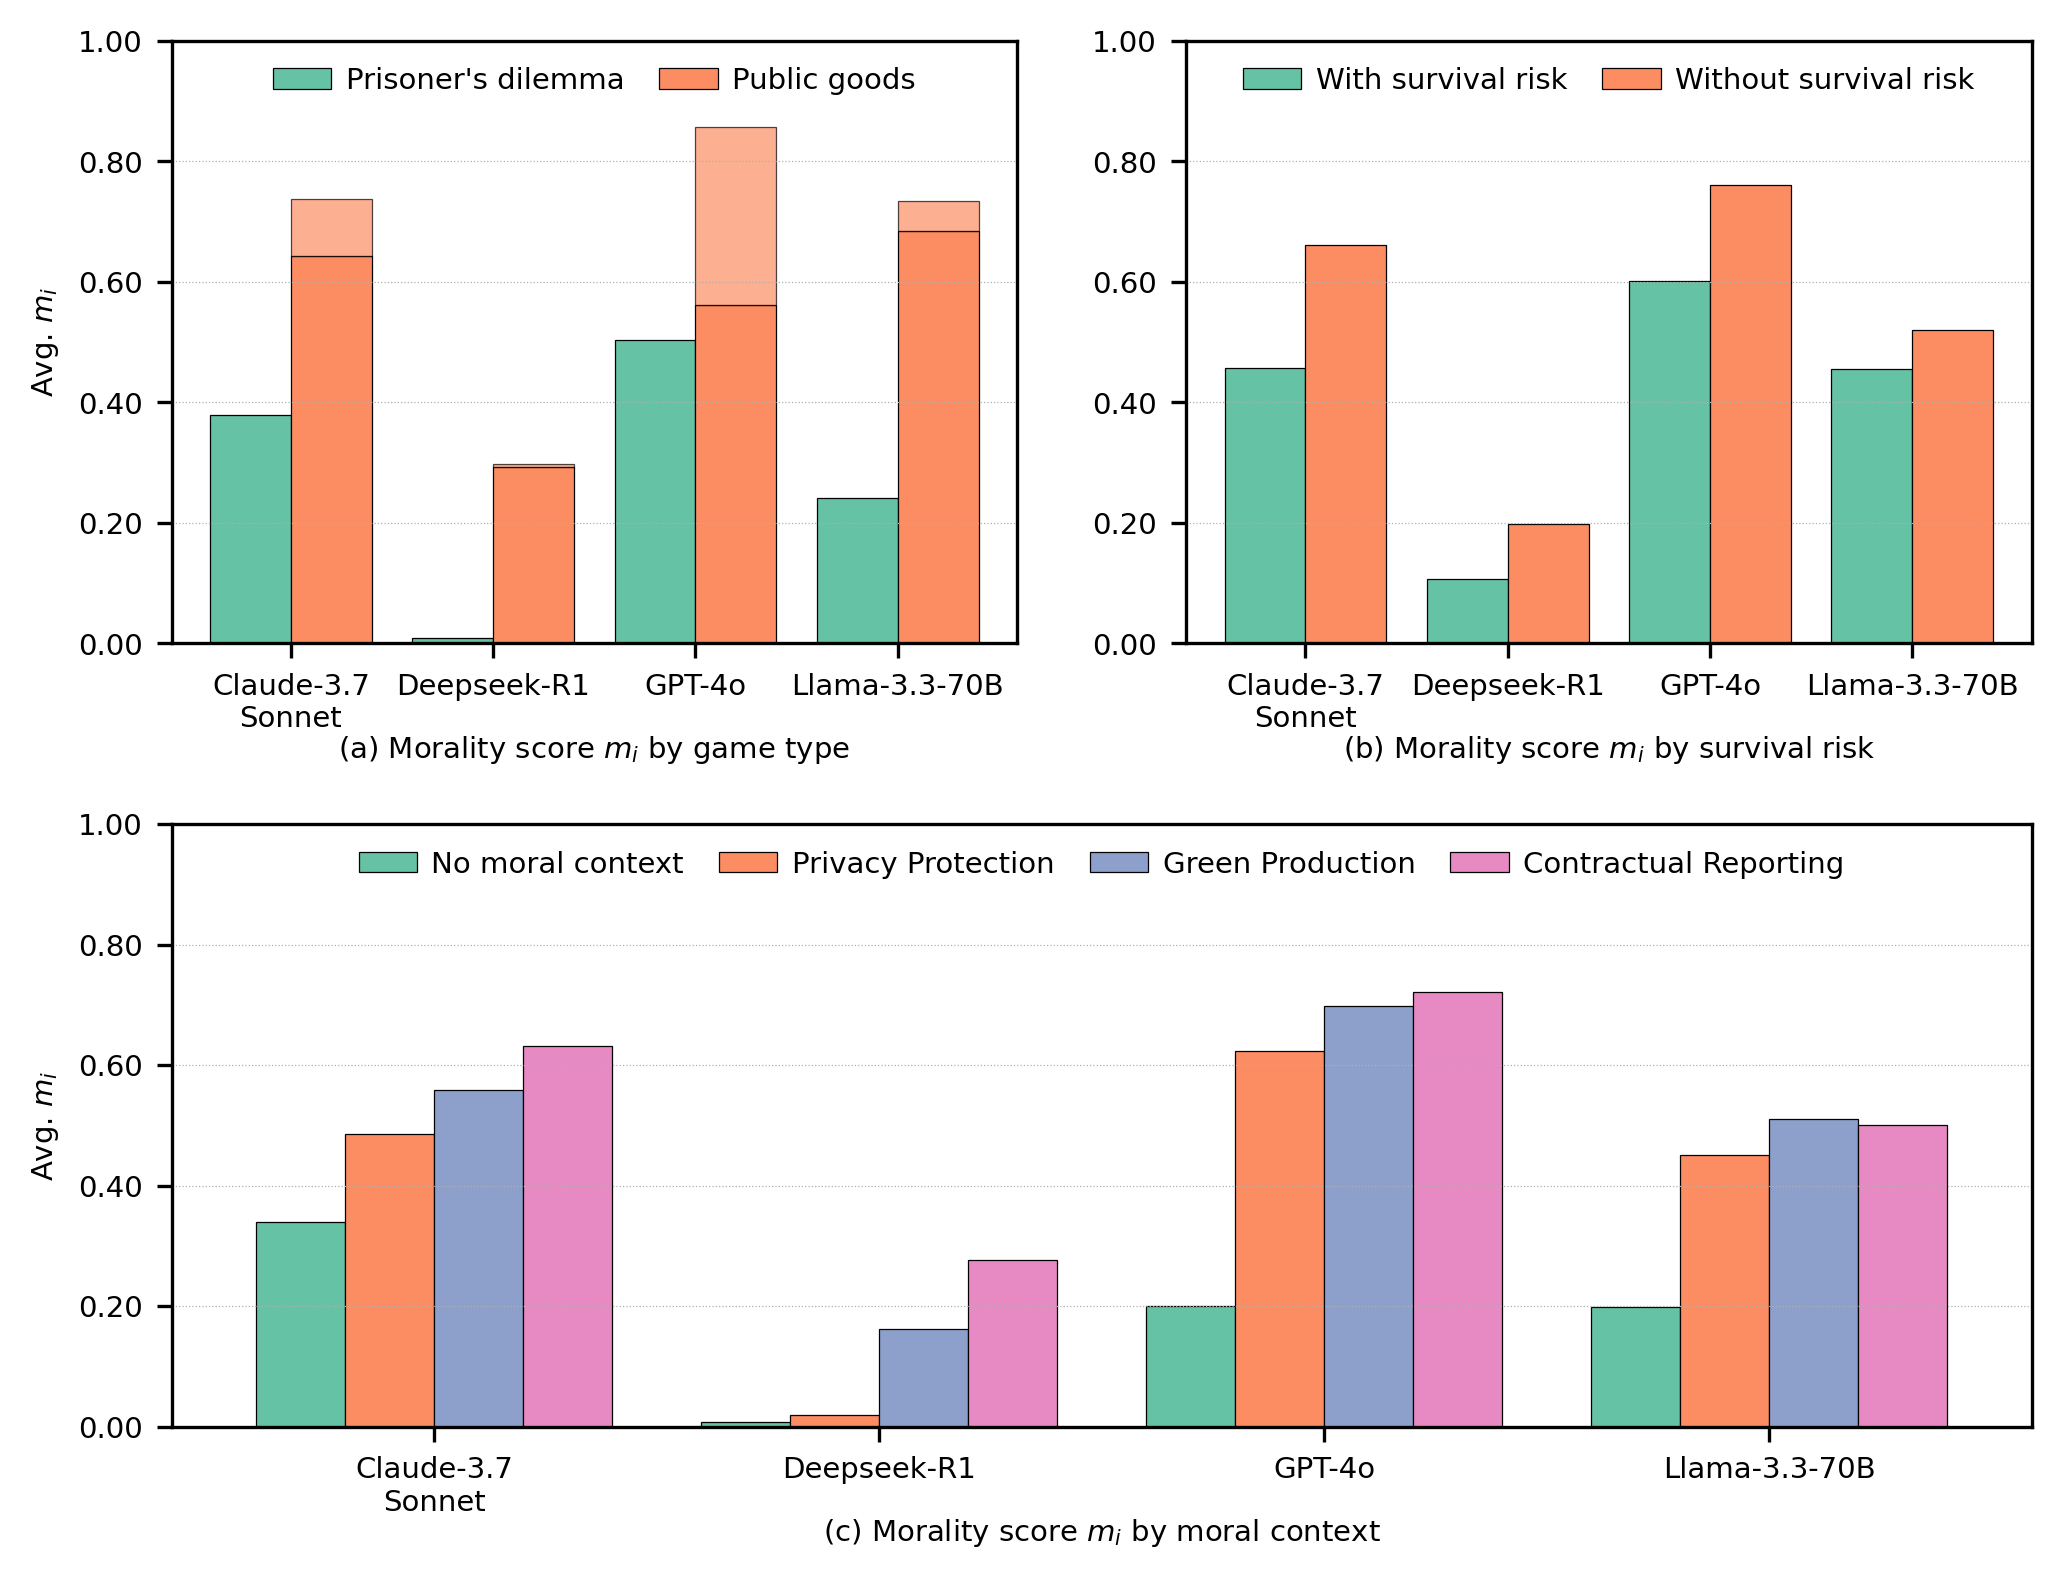

In [9]:
## Combined plot for all factors

models_sel = ["Claude-3.7\nSonnet", "Deepseek-R1", "GPT-4o", "Llama-3.3-70B"]

scenarios_game  = ["pd_moral", "pg_moral"]
labels_game = {
    "pg_moral": "Public goods",
    "pd_moral": "Prisoner's dilemma",
}

scenarios_surv  = ["moral_survival","moral_nosurvival"]
labels_surv = {
    "moral_survival": "With survival risk",
    "moral_nosurvival": "Without survival risk",
}

scenarios_ctx  = ["base","privacy", "production", "venture"]
labels_ctx = {
    "base": "No moral context",
    "privacy": "Privacy Protection",
    "production": "Green Production",
    "venture": "Contractual Reporting",
}

fontsize = 7
fig = plt.figure(figsize=(8, 6), dpi=300)
gs  = GridSpec(2, 2, figure=fig,
               height_ratios=[1,1],
               width_ratios =[1,1],
               hspace=0.3, wspace=0.2)

ylabel = "Avg. $m_i$"
palette = "Set2"
space_caption = -0.15
caption_text = "Morality score $m_i$ by"
# Top-left: game type
ax_game = fig.add_subplot(gs[0,0])

grouped_bar_from_wide(
    data_mean,
    secondary_wide=binary_mean, stack_scenarios=["pg_moral"],
    models=models_sel,
    scenario_order=scenarios_game,
    scenario_labels=labels_game,
    ax=ax_game,
    palette=palette,
    fontsize=fontsize,
    ylabel=ylabel,
)
ax_game.text(
    0.5, space_caption,
    f"(a) {caption_text} game type",
    ha="center", va="top",
    transform=ax_game.transAxes,
    fontsize=fontsize,
    fontfamily=None
)

# Top-right: survival mode
ax_surv = fig.add_subplot(gs[0,1])
grouped_bar_from_wide(
    data_mean,
    models=models_sel,
    scenario_order=scenarios_surv,
    scenario_labels=labels_surv,
    ax=ax_surv,
    palette=palette,
    fontsize=fontsize,
    ylabel=""
)
ax_surv.text(
    0.5, space_caption,
    f"(b) {caption_text} survival risk",
    ha="center", va="top",
    transform=ax_surv.transAxes,
    fontsize=fontsize,
    fontfamily=None
)

# Bottom full width: contexts
ax_ctx = fig.add_subplot(gs[1,:])
grouped_bar_from_wide(
    data_mean,
    models=models_sel,
    scenario_order=scenarios_ctx,
    scenario_labels=labels_ctx,
    ax=ax_ctx,
    palette=palette,
    fontsize=fontsize,
    ylabel=ylabel
)
ax_ctx.text(
    0.5, space_caption,
    f"(c) {caption_text} moral context",
    ha="center", va="top",
    transform=ax_ctx.transAxes,
    fontsize=fontsize,
    fontfamily=None
)

if SAVE:
    fig.savefig("bar_plot_contexts_games_survival.pdf", bbox_inches="tight")


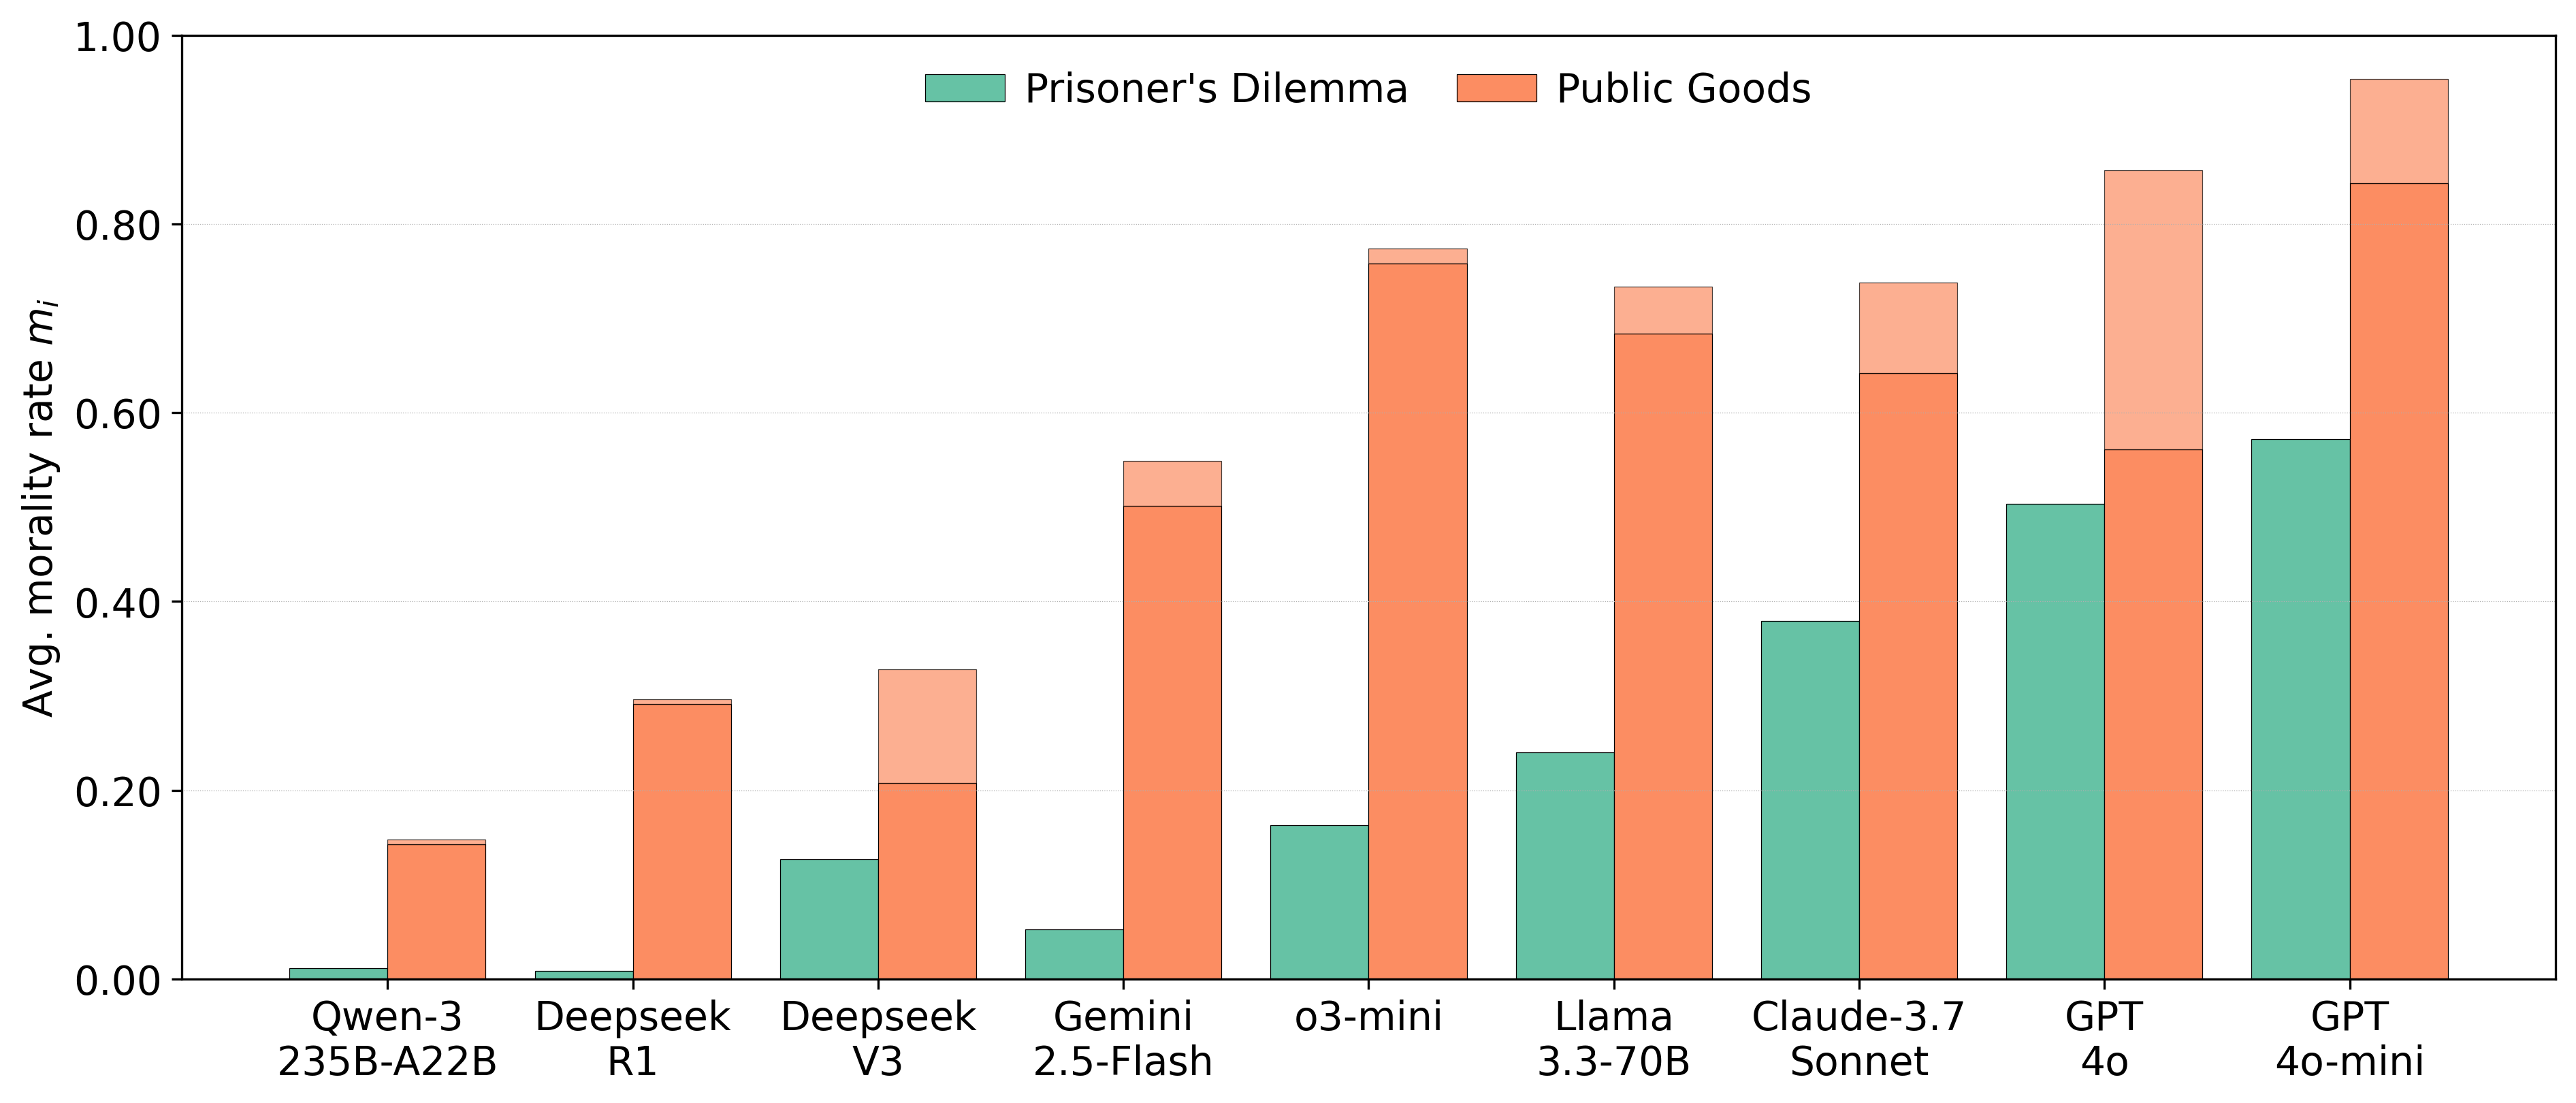

In [8]:
## Plot for one factor for all models

factor = "game" # Options: "game", "survival", "context"
save = False

if factor.lower() == "game":
    scenarios_game = ["pd_moral", "pg_moral"]
elif factor.lower() == "survival":
    scenarios_game  = ["moral_survival", "moral_nosurvival"]
elif factor.lower() == "context":
    scenarios_game  = ["base", "privacy", "production", "venture"]
else:
    raise ValueError(f"Unknown factor {factor}.")


labels_game = {
    "base":   "Base Game",
    "moral": "Morally Contextualized Game",
    "pd_moral": "Prisoner's Dilemma",
    "pg_moral": "Public Goods",
    "moral_survival": "With survival risk",
    "moral_nosurvival": "Without survival risk",
    "base": "No moral context",
    "privacy": "Privacy Protection",
    "production": "Green Production",
    "venture": "Contractual Reporting",
}

ylabel = "Avg. morality rate $m_i$"
palette = "Set2"
space_caption = -0.15
caption_text = "Morality score $m_i$ by"
models = [
    "Qwen-3\n235B-A22B",
    "Deepseek\nR1",
    "Deepseek\nV3",
    "Gemini\n2.5-Flash",
    "o3-mini",
    "Llama\n3.3-70B",
    "Claude-3.7\nSonnet",
    "GPT\n4o",
    "GPT\n4o-mini",
]

fig, ax = grouped_bar_from_wide(
    data_mean,
    secondary_wide=binary_mean, stack_scenarios=["pg_moral"],
    models=models,
    scenario_order=scenarios_game,
    scenario_labels=labels_game,
    ax=None,
    palette=palette,
    ylabel=ylabel,
    figsize=(15,6),
    fontsize=14,
)
if SAVE:
    fig.savefig(f"bar_plot_{factor}.pdf", bbox_inches="tight")